In [14]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score, KFold
RANDOMSTATE=42
from sklearn.metrics import mean_absolute_error
import graphviz
from xgboost.sklearn import XGBRegressor
from scipy.stats import zscore

#  Import and read the charity_data.csv.
batter_woba_df = pd.read_csv("Resources/batting_for_learning.csv")
batter_woba_df.head()

,player_id,year,pa,bip,ba,est_ba,est_ba_minus_ba_diff,slg,est_slg,est_slg_minus_slg_diff,est_woba,est_woba_minus_woba_diff,zscore_difference,avg_woba,woba_2023,z_scores_avg_woba
0,408234,2020.666667,502.666667,351.333333,0.26400,0.2460,0.01800,0.36700,0.395667,-0.028667,0.30700,-0.007667,0.139860,0.299333,0.294,-0.937000
1,444482,2020.000000,516.250000,365.500000,0.26950,0.2540,0.01550,0.44850,0.398750,0.049750,0.31500,0.018750,-0.670811,0.333750,0.305,0.171282
2,453568,2020.000000,622.250000,457.500000,0.28475,0.2795,0.00525,0.47700,0.449000,0.028000,0.34325,0.008000,0.280765,0.351250,0.361,0.734815
3,455117,2020.000000,395.750000,252.500000,0.19900,0.1945,0.00450,0.34525,0.334250,0.011000,0.26800,0.003250,-0.308579,0.271250,0.244,-1.841337
4,456781,2020.666667,292.000000,213.666667,0.29800,0.2860,0.01200,0.41500,0.425000,-0.010000,0.33100,-0.001333,0.542901,0.329667,0.345,0.039790


In [15]:
# Drop the 'Name', IDfg, 'zscore_difference' so it is not part of the regression.
batter_woba_reg = batter_woba_df.copy()
batter_woba_reg.drop(['player_id', 'year', 'woba_2023'], axis=1, inplace=True)

batter_woba_reg.head()

,pa,bip,ba,est_ba,est_ba_minus_ba_diff,slg,est_slg,est_slg_minus_slg_diff,est_woba,est_woba_minus_woba_diff,zscore_difference,avg_woba,z_scores_avg_woba
0,502.666667,351.333333,0.26400,0.2460,0.01800,0.36700,0.395667,-0.028667,0.30700,-0.007667,0.139860,0.299333,-0.937000
1,516.250000,365.500000,0.26950,0.2540,0.01550,0.44850,0.398750,0.049750,0.31500,0.018750,-0.670811,0.333750,0.171282
2,622.250000,457.500000,0.28475,0.2795,0.00525,0.47700,0.449000,0.028000,0.34325,0.008000,0.280765,0.351250,0.734815
3,395.750000,252.500000,0.19900,0.1945,0.00450,0.34525,0.334250,0.011000,0.26800,0.003250,-0.308579,0.271250,-1.841337
4,292.000000,213.666667,0.29800,0.2860,0.01200,0.41500,0.425000,-0.010000,0.33100,-0.001333,0.542901,0.329667,0.039790


In [16]:
# Split our preprocessed data into our features and target arrays
X = batter_woba_reg .drop('zscore_difference', axis=1)  # Features (remove the target column)
y = batter_woba_reg ['zscore_difference']              # Target

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (195, 12)
X_test shape: (49, 12)
y_train shape: (195,)
y_test shape: (49,)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print("Selected X_train shape:", X_train_scaled.shape)
print("Selected X_test shape:", X_test_scaled.shape)
print("Selected y_train shape:", y_train.shape)

Selected X_train shape: (195, 12)
Selected X_test shape: (49, 12)
Selected y_train shape: (195,)


In [18]:
# Create the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    max_depth=2,
    learning_rate=0.01,
    n_estimators=500
)

# Train the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.9196219739473048


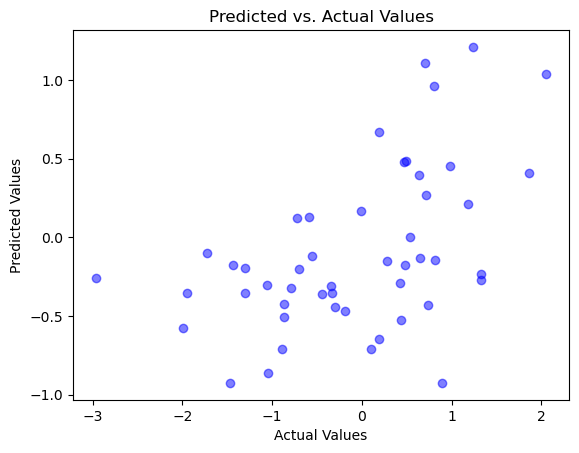

In [20]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [22]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

results_df

,Actual,Predicted
24,-1.299666,-0.192341
6,-0.191308,-0.466806
153,-0.727974,0.123175
211,0.981670,0.455614
198,1.183999,0.209001
176,0.105235,-0.707609
192,-0.336770,-0.356452
124,-0.699190,-0.199261
9,0.737400,-0.429926
101,-0.014643,0.166818


In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.cluster import DBSCAN


# Create the DBSCAN model for outlier detection
dbscan = DBSCAN(eps=.3, min_samples=3)
outlier_labels = dbscan.fit_predict(X_train_scaled)

# Create a new feature indicating whether an instance is an outlier
X_train_with_outliers = np.hstack((X_train_scaled, outlier_labels.reshape(-1, 1)))

# Create the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    max_depth=2,
    learning_rate=0.01,
    n_estimators=500
)

# Train the XGBoost model using data with the outlier information
xgb_model.fit(X_train_with_outliers, y_train)

# Apply the same transformation to the test data
outlier_labels_test = dbscan.fit_predict(X_test_scaled)
X_test_with_outliers = np.hstack((X_test_scaled, outlier_labels_test.reshape(-1, 1)))

# Make predictions using the enhanced model
y_pred_with_outliers = xgb_model.predict(X_test_with_outliers)

# Calculate RMSE
rmse_with_outliers = np.sqrt(mean_squared_error(y_test, y_pred_with_outliers))
print(f"Root Mean Squared Error (with outlier info using DBSCAN): {rmse_with_outliers}")

outlier_labels_test 

Root Mean Squared Error (with outlier info using DBSCAN): 0.9196219739473048


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])